In [0]:
import cv2
import tensorflow as tf

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir('gdrive/My Drive/fruit/')

In [0]:
DATADIR = 'dataset/test'
CATAGORIES = ["freshbanana","rottenbanana"]



In [0]:
def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array)
    plt.show()
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(new_array)
    plt.show()

    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [0]:
model = tf.keras.models.load_model("onefruit-cnn.model")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


  0%|          | 0/381 [00:00<?, ?it/s]

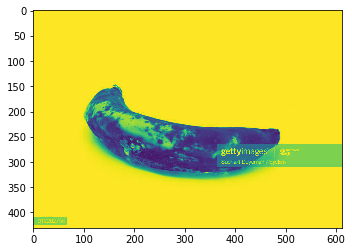

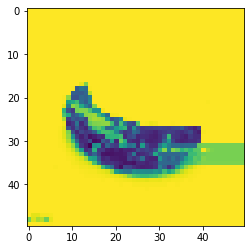

[[1.]]
rotten


In [0]:
from tqdm import tqdm
import matplotlib.pyplot as plt
count = 1
path = os.path.join(DATADIR,CATAGORIES[0])
for img in tqdm(os.listdir(path)):   
  
  #prediction = model.predict([prepare(os.path.join(path,img))])
  #test your own image
  prediction = model.predict([prepare('rotban.jpg')])
  print(prediction) 
  if int(prediction[0][0]) == 1:
    print("rotten")
  else:
    print("fresh")
  
  break
  


In [0]:

testing_data = []
IMG_SIZE = 50

CATEGORIES = ["freshbanana","rottenbanana"]
def create_testing_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category) 

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass
           
create_testing_data()

print(len(testing_data))

100%|██████████| 530/530 [00:03<00:00, 140.20it/s]

911


In [0]:
import random

random.shuffle(testing_data)
X = []
y = []
import numpy as np
for features,label in testing_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
import pickle

pickle_out = open("ATXNS.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("atyns.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]]


In [0]:
import pickle
pickle_in = open("ATX.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("aty.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0


In [0]:
results = model.evaluate(X, y, batch_size=128)
print('test loss, test acc:', results)

911/911 [==============================] - 1s 984us/sample - loss: 21.8539 - acc: 0.9243
test loss, test acc: [21.853867230378704, 0.92425907]


In [0]:
loss_train = history.history['train_loss']
loss_val = history.history['val_loss']
epochs = range(1,35)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
from tqdm import tqdm
import matplotlib.pyplot as plt
count = 1
pred = []

for category in CATEGORIES:
  path = os.path.join(DATADIR,category)  
  print(path)
  for img in tqdm(os.listdir(path)):   
    #prediction = model.predict([prepare(os.path.join(path,img))])
    #prediction = model.predict([prepare('samples/fapp.jpg')])
    #print(prediction) 
    if int(prediction[0][0]) == 1:
      pred.append("Rotten Banana")
    else:
      pred.append("Fresh Banana")

  
  
  

  2%|▏         | 8/381 [00:00<00:04, 75.39it/s]

dataset/test/freshbanana


  2%|▏         | 8/530 [00:00<00:06, 77.57it/s]

dataset/test/rottenbanana


100%|██████████| 530/530 [00:06<00:00, 86.21it/s]


In [0]:
print(pred[:10])

['Fresh Banana', 'Fresh Banana', 'Fresh Banana', 'Fresh Banana', 'Fresh Banana', 'Fresh Banana', 'Fresh Banana', 'Fresh Banana', 'Fresh Banana', 'Fresh Banana']


In [0]:
import random

#random.shuffle(testing_data)
X = []
y = []
actual = []
import numpy as np
for features,label in testing_data:
    X.append(features)
    y.append(label)
print(y[900:])
for i in y:
  if i == 1:
      actual.append("Rotten Banana")
  else:
      actual.append("Fresh Banana")
print(actual[:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
['Fresh Banana', 'Fresh Banana', 'Fresh Banana', 'Fresh Banana', 'Fresh Banana', 'Fresh Banana', 'Fresh Banana', 'Fresh Banana', 'Fresh Banana', 'Fresh Banana']


In [0]:
import csv
import pandas as pd

fruits = {'Actual Fruit': actual,
        'Predicted Fruit': pred
        }

df = pd.DataFrame(fruits, columns= ['Actual Fruit', 'Predicted Fruit'])

In [0]:
df.head()

,Actual Fruit,Predicted Fruit
0,Fresh Banana,Fresh Banana
1,Fresh Banana,Fresh Banana
2,Fresh Banana,Fresh Banana
3,Fresh Banana,Fresh Banana
4,Fresh Banana,Fresh Banana


In [0]:
from sklearn.utils import shuffle
df = shuffle(df)

In [0]:
df.head()

,Actual Fruit,Predicted Fruit
707,Rotten Banana,Rotten Banana
106,Fresh Banana,Fresh Banana
646,Rotten Banana,Rotten Banana
695,Rotten Banana,Fresh Banana
166,Fresh Banana,Fresh Banana


In [0]:
df.to_csv("ClassifiedFruits.csv")